# Лабораторная работа №5 

**Задание**  
1. Выберите набор данных (датасет) для решения задачи классификации или регресии.

2. В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.

3. С использованием метода train_test_split разделите выборку на обучающую и тестовую.

4. Обучите следующие ансамблевые модели:
- две модели группы бэггинга (бэггинг или случайный лес или сверхслучайные деревья);
- AdaBoost;
- градиентный бустинг.
5. Оцените качество моделей с помощью одной из подходящих для задачи метрик. Сравните качество полученных моделей.

### Импорт библиотек

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, OneHotEncoder 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay


## Загрузка датасета

| Признак    | Описание |
|-------------|------------|
| age         | Возраст пациента в годах. |
| sex         | Пол пациента, где 1 = мужской и 0 = женский. |
| cp          | Тип испытываемой грудной боли: <br> 0: Типичная стенокардия (связана с пониженным кровотоком к сердцу)<br> 1: Атипичная стенокардия (не связана с сердечными проблемами)<br> 2: Несердечная боль (грудная боль не связана с сердцем)<br> 3: Бессимптомно (без боли в груди). |
| trestbps    | Артериальное давление в покое (в мм рт. ст.), измеренное при поступлении в больницу. Высокие значения могут свидетельствовать о гипертонии. |
| chol        | Холестерин в сыворотке крови в мг/дл. Высокие уровни холестерина связаны с повышенным риском заболеваний сердца. |
| fbs         | Уровень сахара в крови натощак. Указывает, превышает ли сахар в крови натощак 120 мг/дл: <br> 1 = Да (повышенный риск диабета) <br> 0 = Нет (нормальное значение). |
| restecg     | Результаты электрокардиограммы в покое: <br> 0: Нормальный <br> 1: Аномалии зубца ST-T (например, инверсии волны T, изменение ST более 0,05 мВ)<br> 2: Вероятная или определенная гипертрофия левого желудочка по критериям Эстеса. |
| thalach     | Максимальная частота сердцебиений во время теста. Более низкая частота может указывать на более плохую физическую форму или проблемы с сердечной функцией. |
| exang       | Стенокардия, вызванная физической нагрузкой (боль в груди во время упражнений): <br> 1 = Да (боль в груди при физической нагрузке)<br> 0 = Нет. |
| oldpeak     | ST-депрессия, вызванная упражнениями по сравнению с состоянием покоя. Более высокие значения указывают на потенциальный риск проблем с сердцем. |
| slope       | Наклон сегмента ST в пике физической нагрузки: <br> 0: Восходящий (нормальная реакция)<br> 1: Плоский (ненормальная реакция)<br> 2: Нисходящий (может указывать на проблемы с сердцем). |
| ca          | Количество крупных сосудов (от 0 до 3), окрашенных при флюорографии. Большее количество указывает на более серьезные закупорки в крупных сердечных сосудах. |
| thal        | Тип нарушения крови талассемии: <br> 0: Ошибка/отсутствие значения <br> 1: Фиксированный дефект (постоянный дефект, такой как рубцовая ткань)<br>


In [89]:
data = pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [90]:
data = data.rename(
    columns = {'cp':'chest_pain_type', 
               'trestbps':'resting_blood_pressure', 
               'chol': 'cholesterol',
               'fbs': 'fasting_blood_sugar',
               'restecg' : 'resting_electrocardiogram', 
               'thalach': 'max_heart_rate_achieved', 
               'exang': 'exercise_induced_angina',
               'oldpeak': 'st_depression', 
               'slope': 'st_slope', 
               'ca':'num_major_vessels', 
               'thal': 'thalassemia'}, 
    errors="raise")

## Первичный анализ датасета

In [91]:
data.shape

(303, 14)

In [92]:
data.isnull().sum() # --> нет пропусков в данных

age                          0
sex                          0
chest_pain_type              0
resting_blood_pressure       0
cholesterol                  0
fasting_blood_sugar          0
resting_electrocardiogram    0
max_heart_rate_achieved      0
exercise_induced_angina      0
st_depression                0
st_slope                     0
num_major_vessels            0
thalassemia                  0
target                       0
dtype: int64

In [93]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        303 non-null    int64  
 1   sex                        303 non-null    int64  
 2   chest_pain_type            303 non-null    int64  
 3   resting_blood_pressure     303 non-null    int64  
 4   cholesterol                303 non-null    int64  
 5   fasting_blood_sugar        303 non-null    int64  
 6   resting_electrocardiogram  303 non-null    int64  
 7   max_heart_rate_achieved    303 non-null    int64  
 8   exercise_induced_angina    303 non-null    int64  
 9   st_depression              303 non-null    float64
 10  st_slope                   303 non-null    int64  
 11  num_major_vessels          303 non-null    int64  
 12  thalassemia                303 non-null    int64  
 13  target                     303 non-null    int64  

In [94]:
# Заменяем значения в столбце 'sex'
data["sex"] = data["sex"].replace({0: "female", 1: "male"})

# Заменяем значения в столбце 'chest_pain_type'
data["chest_pain_type"] = data["chest_pain_type"].replace(
    {
        0: "typical angina",
        1: "atypical angina",
        2: "non-anginal pain",
        3: "asymptomatic",
    }
)

# Заменяем значения в столбце 'fasting_blood_sugar'
data["fasting_blood_sugar"] = data["fasting_blood_sugar"].replace(
    {0: "lower than 120mg/ml", 1: "greater than 120mg/ml"}
)

# Заменяем значения в столбце 'resting_electrocardiogram'
data["resting_electrocardiogram"] = data["resting_electrocardiogram"].replace(
    {0: "normal", 1: "ST-T wave abnormality", 2: "left ventricular hypertrophy"}
)

# Заменяем значения в столбце 'exercise_induced_angina'
data["exercise_induced_angina"] = data["exercise_induced_angina"].replace(
    {0: "no", 1: "yes"}
)

# Заменяем значения в столбце 'st_slope'
data["st_slope"] = data["st_slope"].replace(
    {0: "upsloping", 1: "flat", 2: "downsloping"}
)

# Заменяем значения в столбце 'thalassemia'
data["thalassemia"] = data["thalassemia"].replace(
    {1: "fixed defect", 2: "normal", 3: "reversable defect"}
)

In [95]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        303 non-null    int64  
 1   sex                        303 non-null    object 
 2   chest_pain_type            303 non-null    object 
 3   resting_blood_pressure     303 non-null    int64  
 4   cholesterol                303 non-null    int64  
 5   fasting_blood_sugar        303 non-null    object 
 6   resting_electrocardiogram  303 non-null    object 
 7   max_heart_rate_achieved    303 non-null    int64  
 8   exercise_induced_angina    303 non-null    object 
 9   st_depression              303 non-null    float64
 10  st_slope                   303 non-null    object 
 11  num_major_vessels          303 non-null    int64  
 12  thalassemia                303 non-null    object 
 13  target                     303 non-null    int64  

In [96]:
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,male,asymptomatic,145,233,greater than 120mg/ml,normal,150,no,2.3,upsloping,0,fixed defect,1
1,37,male,non-anginal pain,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,upsloping,0,normal,1
2,41,female,atypical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,downsloping,0,normal,1
3,56,male,atypical angina,120,236,lower than 120mg/ml,ST-T wave abnormality,178,no,0.8,downsloping,0,normal,1
4,57,female,typical angina,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,downsloping,0,normal,1


In [ ]:
# Числовые признаки
num_feats = ['age', 'cholesterol', 'resting_blood_pressure', 'max_heart_rate_achieved', 'st_depression', 'num_major_vessels']

# Категориальные признаки 
bin_feats = ['sex', 'fasting_blood_sugar', 'exercise_induced_angina']
nom_feats= ['chest_pain_type', 'resting_electrocardiogram', 'st_slope', 'thalassemia']
cat_feats = nom_feats + bin_feats

<Axes: >

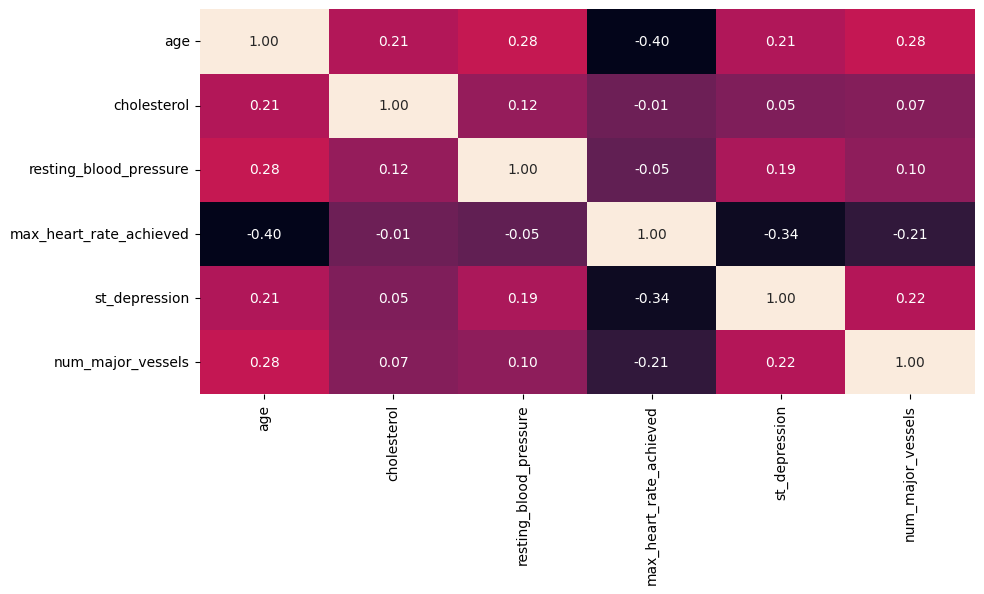

In [100]:
df_ = data[num_feats]
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(df_.corr(method='pearson'), ax=ax, annot=True, fmt='.2f', cbar=False)

## Разделение выборки

In [101]:
x = data.drop(['target'], axis=1)
y = data['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

## Масштабирование данных

In [109]:
num_pipeline = Pipeline([("scaling", RobustScaler())])

cat_pipeline = Pipeline([("onehot", OneHotEncoder())]) 
for col in cat_feats:
    x_train[col] = x_train[col].astype(str)
    x_test[col] = x_test[col].astype(str)
    
preprocessor = ColumnTransformer(
    [
        ("categorical", cat_pipeline, cat_feats),
        ("numerical", num_pipeline, num_feats),
    ],
    remainder="passthrough",
)

process_pipeline = Pipeline([("preprocessor", preprocessor)])

x_train_scaled = process_pipeline.fit_transform(x_train)
x_test_scaled = process_pipeline.transform(x_test)

## Обучение моделей

### Случайный лес

In [110]:
rf_cl = RandomForestClassifier(random_state=10, n_jobs=-1)
rf_cl.fit(x_train_scaled, y_train)


RandomForestClassifier(n_jobs=-1, random_state=10)

### Сверхслучайные деревья

In [111]:
et_cl = ExtraTreesClassifier(random_state=10, n_jobs=-1)
et_cl.fit(x_train_scaled, y_train)

ExtraTreesClassifier(n_jobs=-1, random_state=10)

### AdaBoost

In [112]:
ab_cl = AdaBoostClassifier(random_state=10)
ab_cl.fit(x_train_scaled, y_train)

AdaBoostClassifier(random_state=10)

### Градиентный бустинг

In [113]:
gb_cl = GradientBoostingClassifier(loss="exponential", random_state=10)
gb_cl.fit(x_train_scaled, y_train)

GradientBoostingClassifier(loss='exponential', random_state=10)

## Оценка качества моделей

### Основные метрики

**Accuracy**  
Процент (долю в диапазоне от 0 до 1) правильно определенных классов. 

**Precision**  
$precision = \frac{TP}{TP+FP}$  
Доля верно предсказанных классификатором положительных объектов, из всех объектов, которые классификатор верно или неверно определил как положительные.

**Recall**  
$recall = \frac{TP}{TP+FN}$  
Доля верно предсказанных классификатором положительных объектов, из всех действительно положительных объектов.

**F1-мера**  
$F_1 = 2 \cdot \frac{precision \cdot recall}{precision + recall}$

In [114]:
y_pred_rf = rf_cl.predict(x_test_scaled)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.85      0.80      0.82        35
           1       0.75      0.81      0.78        26

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



In [115]:
y_pred_et = et_cl.predict(x_test_scaled)
print(classification_report(y_test, y_pred_et))

              precision    recall  f1-score   support

           0       0.85      0.80      0.82        35
           1       0.75      0.81      0.78        26

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



In [116]:
y_pred_ab = ab_cl.predict(x_test_scaled)
print(classification_report(y_test, y_pred_ab))

              precision    recall  f1-score   support

           0       0.84      0.77      0.81        35
           1       0.72      0.81      0.76        26

    accuracy                           0.79        61
   macro avg       0.78      0.79      0.78        61
weighted avg       0.79      0.79      0.79        61



In [117]:
y_pred_gb = gb_cl.predict(x_test_scaled)
print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       0.85      0.80      0.82        35
           1       0.75      0.81      0.78        26

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



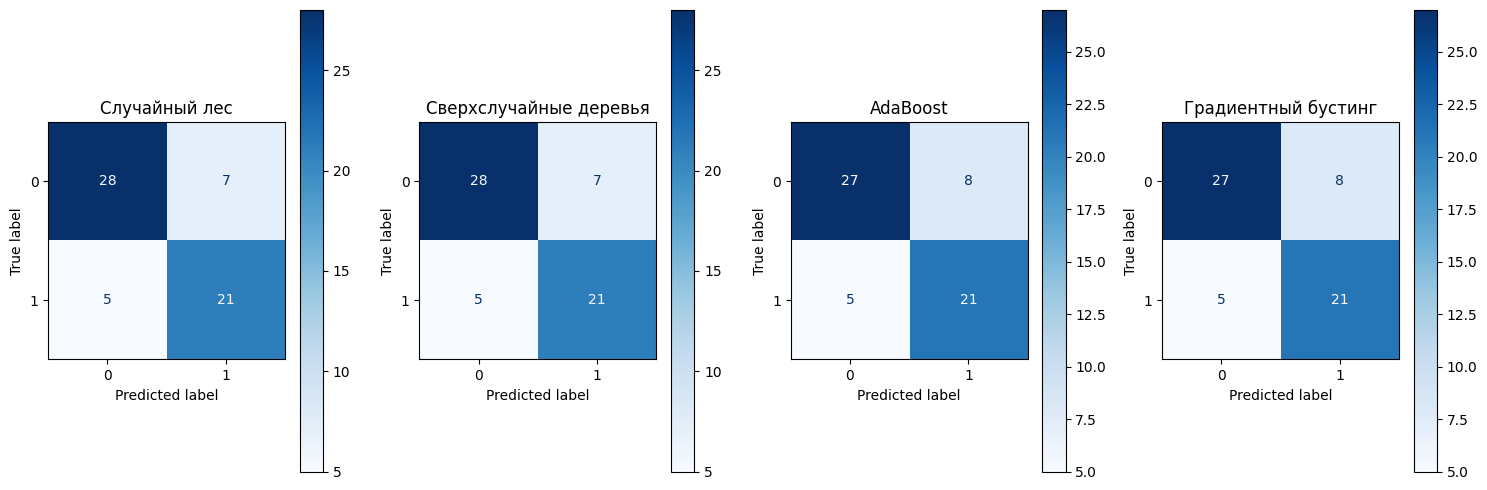

In [118]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_et = confusion_matrix(y_test, y_pred_et)  
cm_ab = confusion_matrix(y_test, y_pred_ab) 
cm_gb = confusion_matrix(y_test, y_pred_gb) 

fig, axes = plt.subplots(1, 4, figsize=(15, 5))

disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp1.plot(ax=axes[0], cmap=plt.cm.Blues)
axes[0].set_title('Случайный лес')

disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_et)
disp2.plot(ax=axes[1], cmap=plt.cm.Blues)
axes[1].set_title('Сверхслучайные деревья')

disp3 = ConfusionMatrixDisplay(confusion_matrix=cm_ab)
disp3.plot(ax=axes[2], cmap=plt.cm.Blues)
axes[2].set_title('AdaBoost')

disp4 = ConfusionMatrixDisplay(confusion_matrix=cm_gb)
disp3.plot(ax=axes[3], cmap=plt.cm.Blues)
axes[3].set_title('Градиентный бустинг')

plt.tight_layout()
plt.show()